# `20190103a` - New board tests

In [7]:
from pyUn0 import *

pyexiv2 does not exist on RPi


In [8]:
UN0RICK = us_spi()
UN0RICK.init()

Reset GPIO 23 - Low 1s
Reset GPIO 23 - High 0.2s
spi.cshigh is False
spi mode is 1
spi maxspeed is 2000000hz


In [9]:
UN0RICK.test_spi(3)

In [10]:
UN0RICK.JSON["firmware_version"]="MATTY_un0rick_20180826.bin"
UN0RICK.JSON["experiment"]["description"]="Testing if the lib works"
UN0RICK.JSON["experiment"]["probe"]="piezo"
UN0RICK.JSON["experiment"]["target"] = "a reflector few cms away"
UN0RICK.JSON["V"]="48"
UN0RICK.JSON["N"] = 1 # Experiment ID

In [11]:
Curve = UN0RICK.create_tgc_curve(300,900,True)[0] # Sets the DAC, 50mV to 850mv
UN0RICK.set_tgc_curve(Curve)
UN0RICK.set_period_between_acqs(int(2500000)) # 2.5ms
UN0RICK.set_multi_lines(True)				        # Multi lines acquisition	
UN0RICK.set_acquisition_number_lines(3)				            # Setting the number of lines
UN0RICK.set_msps(3) 					            # Acquisition Freq
A = UN0RICK.set_timings(200,100,2000,5000,200000)		# Settings the series of pulses

Setting up the DAC
Setting up the DAC
Period between two acquisitions: 250000 us --
Arguments: 0x3 0xd0 0x90
Doing several lines.
Remember to indicate how many lines
Number of lines: 3
Acquisition frequency set at 16.0 Msps
Pulse width: 200  ns --  0x14
Pulses delay: 300  ns --  0x1e
Acquisition length:  200000 ns.
Arguments:  0x64 0x0
set_pulse_train Lacq 200000
NAcq = 9360


In [12]:
UN0RICK.JSON["data"] = UN0RICK.do_acquisition()
UN0RICK.JSON["N"] = UN0RICK.JSON["N"] + 1

0% - 129
10% - 132
20% - 132
30% - 132
40% - 164
50% - 164
60% - 164
70% - 195
80% - 196
90% - 196
100% - 12
Took 2.10 seconds to transfer.
for 18722 transfers of data
20190103a-1.json: file saved.


In [13]:
Curve = UN0RICK.create_tgc_curve(300,900,True)[0] # Sets the DAC, 50mV to 850mv
UN0RICK.set_tgc_curve(Curve)
UN0RICK.set_multi_lines(False)				        # Multi lines acquisition	
#UN0RICK.set_acquisition_number_lines(160)				            # Setting the number of lines
UN0RICK.set_msps(0) 					            # Acquisition Freq
A = UN0RICK.set_timings(200,100,2000,5000,200000)		# Settings the series of pulses

Setting up the DAC
Setting up the DAC
Doing a single line
Acquisition frequency set at 64.0 Msps
Pulse width: 200  ns --  0x14
Pulses delay: 300  ns --  0x1e
Acquisition length:  200000 ns.
Arguments:  0x64 0x0
set_pulse_train Lacq 200000
NAcq = 12480


In [14]:
UN0RICK.JSON["data"] = UN0RICK.do_acquisition()
UN0RICK.JSON["N"] = UN0RICK.JSON["N"] + 1

0% - 129
10% - 131
20% - 132
30% - 131
40% - 131
50% - 132
60% - 132
70% - 132
80% - 132
90% - 132
100% - 31
Took 2.82 seconds to transfer.
for 24962 transfers of data
20190103a-2.json: file saved.


In [17]:
LastJSON = UN0RICK.JSON["N"] -1
print LastJSON

for MyDataFile in os.listdir("./"):
    if MyDataFile.endswith(str(LastJSON)+".json"):
        y = us_json()
        y.JSONprocessing("./"+MyDataFile)

2
Data acquired


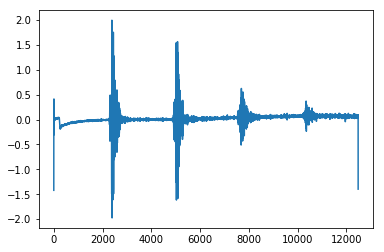

In [19]:
plt.plot(y.tmp)
plt.show()